# TASK 1: STOCK PREDICTION

LIBRARIES

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

LOADING AND EXPLORING OF DATASET

In [7]:
dataset = pd.read_csv('Tata_Motors_Ltd._historical_data.csv')
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,43.500000,43.500000,43.500000,43.500000,16.114737,0
1,2000-01-04,43.500000,43.500000,43.500000,43.500000,16.114737,0
2,2000-01-05,43.500000,43.500000,43.500000,43.500000,16.114737,0
3,2000-01-06,43.500000,43.500000,43.500000,43.500000,16.114737,0
4,2000-01-07,43.500000,43.500000,43.500000,43.500000,16.114737,0
...,...,...,...,...,...,...,...
5881,2023-08-28,606.299988,608.400024,601.549988,602.200012,602.200012,1317553
5882,2023-08-29,604.900024,610.549988,603.000000,606.549988,606.549988,524651
5883,2023-08-30,611.200012,613.000000,604.799988,605.549988,605.549988,523411
5884,2023-08-31,608.049988,609.650024,599.099976,601.099976,601.099976,1242644


In [8]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,43.5,43.5,43.5,43.5,16.114737,0
1,2000-01-04,43.5,43.5,43.5,43.5,16.114737,0
2,2000-01-05,43.5,43.5,43.5,43.5,16.114737,0
3,2000-01-06,43.5,43.5,43.5,43.5,16.114737,0
4,2000-01-07,43.5,43.5,43.5,43.5,16.114737,0


In [9]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5886.000000,5886.000000,5886.000000,5886.000000,5886.000000,5.886000e+03
mean,219.050581,222.092077,215.580924,218.658936,201.175923,2.586247e+06
std,161.660368,163.654766,159.364258,161.370974,172.828015,4.579995e+06
min,12.049999,12.049999,12.049999,12.049999,4.463967,0.000000e+00
25%,85.247496,86.092497,84.267500,85.125002,42.817844,5.867780e+05
50%,171.600006,174.800003,168.654999,171.375000,150.500000,1.398945e+06
75%,350.437492,358.075005,344.650002,352.274994,352.189270,3.121360e+06
max,646.200012,665.299988,639.000000,640.599976,640.599976,2.190277e+08


PREPROCESSING ON DATASET

In [10]:
dataset = dataset.sort_values('Date')
features = ['Open', 'High', 'Low', 'Close', 'Volume']

In [11]:
data = dataset[features].values

In [12]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [13]:
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

In [14]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
# Reshape the data for the LSTM model
time_step = 100  # This value can be adjusted
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

LSTM MODEL CREATION

In [16]:
# Reshape the input to be 3D [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [17]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
144/144 [==============================] - 36s 151ms/step - loss: 0.0050
Epoch 2/50
144/144 [==============================] - 23s 159ms/step - loss: 7.2550e-04
Epoch 3/50
144/144 [==============================] - 21s 148ms/step - loss: 6.1311e-04
Epoch 4/50
144/144 [==============================] - 23s 158ms/step - loss: 5.5397e-04
Epoch 5/50
144/144 [==============================] - 23s 162ms/step - loss: 4.2498e-04
Epoch 6/50
144/144 [==============================] - 21s 142ms/step - loss: 4.0436e-04
Epoch 7/50
144/144 [==============================] - 22s 156ms/step - loss: 3.4239e-04
Epoch 8/50
144/144 [==============================] - 22s 153ms/step - loss: 2.7727e-04
Epoch 9/50
144/144 [==============================] - 24s 166ms/step - loss: 2.4252e-04
Epoch 10/50
144/144 [==============================] - 22s 154ms/step - loss: 2.3679e-04
Epoch 11/50
144/144 [==============================] - 23s 163ms/step - loss: 2.2624e-04
Epoch 12/50
144/144 [=============

MODEL PREDICTION

In [20]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

34/34 [==============================] - 2s 54ms/step


In [24]:
train_predict = train_predict.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
test_predict = test_predict.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [26]:
print("Shapes before transformation:")
print("Train predict shape:", train_predict.shape)
print("Y train shape:", y_train.shape)
print("Test predict shape:", test_predict.shape)
print("Y test shape:", y_test.shape)


Shapes before transformation:
Train predict shape: (4607, 1)
Y train shape: (4607, 1)
Test predict shape: (1077, 1)
Y test shape: (1077, 1)


In [27]:
train_predict = np.array(train_predict)
y_train = np.array(y_train)
test_predict = np.array(test_predict)
y_test = np.array(y_test)

In [29]:
# Reverse the scaling manually
train_predict = train_predict * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]
y_train = y_train * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]
test_predict = test_predict * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]
y_test = y_test * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]

In [30]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print("Train RMSE: ", train_rmse)
print("Test RMSE: ", test_rmse)

Train RMSE:  5.9416080426763225
Test RMSE:  8.732686087075818


PREDICTION VISUALIZATION

In [32]:
train_time_steps = np.arange(0, len(train_predict))
test_time_steps = np.arange(len(train_predict), len(train_predict) + len(test_predict))


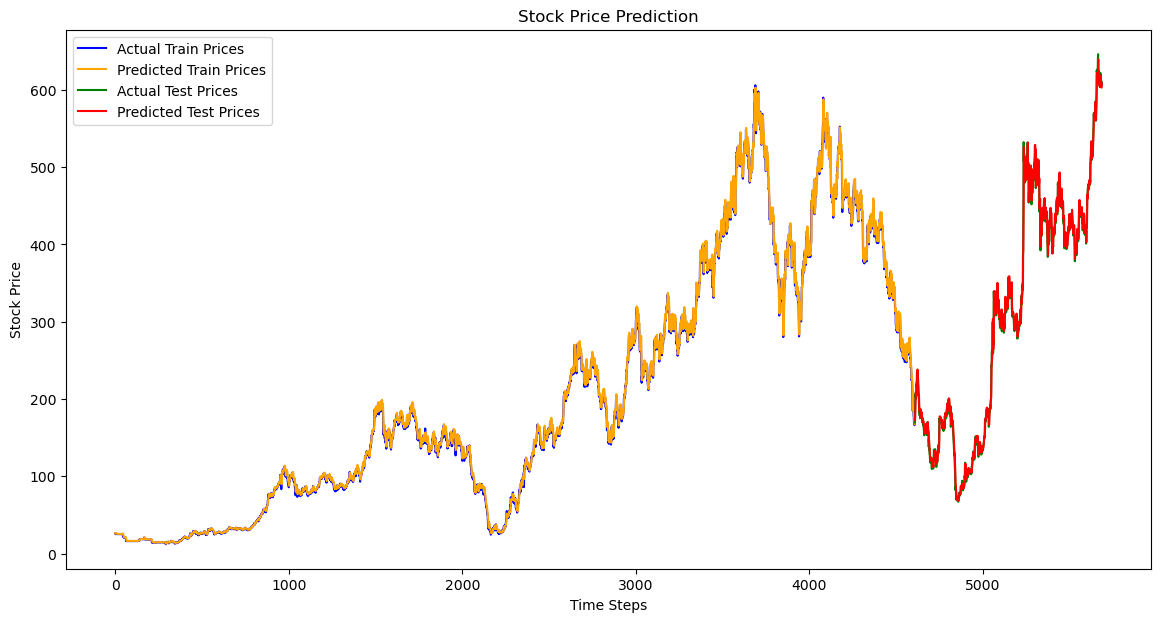

In [33]:
# Visualize the results
plt.figure(figsize=(14, 7))
plt.plot(train_time_steps, y_train, label='Actual Train Prices', color='blue')
plt.plot(train_time_steps, train_predict, label='Predicted Train Prices', color='orange')
plt.plot(test_time_steps, y_test, label='Actual Test Prices', color='green')
plt.plot(test_time_steps, test_predict, label='Predicted Test Prices', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()